In [5]:
#import necessary packages
import pandas as pd
import numpy as np
# load the AirlinesCluster dataset
url = "C:/Users/Amar/Downloads/AirlinesCluster.csv"
airlines_dataset = pd.read_csv(url)
# suppress scientific float notation
np.set_printoptions(precision=5, suppress=True)
# visualization of the first few records of the dataset
print(airlines_dataset.head())
print(airlines_dataset.head(n=2))
# visualization of the last few records from the dataset
print(airlines_dataset.tail())
print(airlines_dataset.tail(n=2))
# display the different datatypes available in the dataset
print(airlines_dataset.dtypes)
# visualization of descriptive stats of the dataset
print(airlines_dataset.describe())

   Balance  QualMiles  BonusMiles  BonusTrans  FlightMiles  FlightTrans  \
0    28143          0         174           1            0            0   
1    19244          0         215           2            0            0   
2    41354          0        4123           4            0            0   
3    14776          0         500           1            0            0   
4    97752          0       43300          26         2077            4   

   DaysSinceEnroll  
0             7000  
1             6968  
2             7034  
3             6952  
4             6935  
   Balance  QualMiles  BonusMiles  BonusTrans  FlightMiles  FlightTrans  \
0    28143          0         174           1            0            0   
1    19244          0         215           2            0            0   

   DaysSinceEnroll  
0             7000  
1             6968  
      Balance  QualMiles  BonusMiles  BonusTrans  FlightMiles  FlightTrans  \
3994    18476          0        8525           4        

In [6]:
# import the necessary packages
from sklearn import preprocessing
#standardize the data to normal distribution
dataset_standardized = preprocessing.scale(airlines_dataset)
# visualization of descriptive stats of the normalized dataset
dataset_standardized = pd.DataFrame(dataset_standardized)
print(dataset_standardized.describe())

                  0             1             2             3             4  \
count  3.999000e+03  3.999000e+03  3.999000e+03  3.999000e+03  3.999000e+03   
mean   5.756558e-16 -7.588884e-17 -5.515024e-16 -2.877696e-15  5.781822e-16   
std    1.000125e+00  1.000125e+00  1.000125e+00  1.000125e+00  1.000125e+00   
min   -7.304396e-01 -1.862987e-01 -7.099918e-01 -1.208203e+00 -3.286033e-01   
25%   -5.465676e-01 -1.862987e-01 -6.582276e-01 -8.957878e-01 -3.286033e-01   
50%   -3.027332e-01 -1.862987e-01 -4.130308e-01  4.145743e-02 -3.286033e-01   
75%    1.866028e-01 -1.862987e-01  2.756198e-01  5.621492e-01 -1.064658e-01   
max    1.618884e+01  1.422486e+01  1.020957e+01  7.747696e+00  2.168300e+01   

                  5             6  
count  3.999000e+03  3.999000e+03  
mean  -1.206323e-15  1.406727e-15  
std    1.000125e+00  1.000125e+00  
min   -3.621679e-01 -1.993611e+00  
25%   -3.621679e-01 -8.661823e-01  
50%   -3.621679e-01 -1.092530e-02  
75%   -9.850333e-02  8.097050e-01  


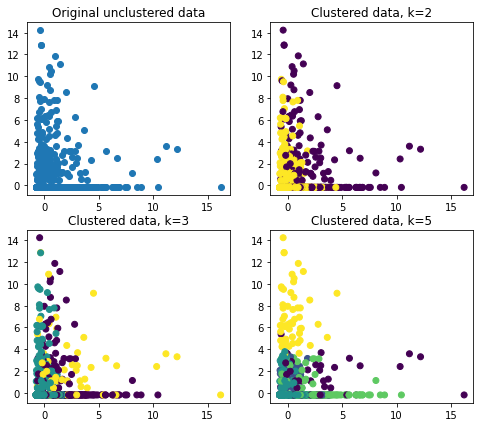

                     Balance    QualMiles    BonusMiles  BonusTrans  \
KmeansCluster                                                         
1              191736.335664   471.566434  33093.335664   28.356643   
2               57871.443478    56.291304   8831.036232    9.186957   
3               38081.397459    37.934059   6726.474289    7.620690   
4              153250.376302    76.164062  51347.610677   21.322917   
5              116472.400000  5636.345455  19804.290909   12.545455   

               FlightMiles  FlightTrans  DaysSinceEnroll  
KmeansCluster                                             
1              5763.132867    16.769231      4666.412587  
2               215.649275     0.653623      5825.682609  
3               179.379310     0.554749      2284.432547  
4               479.893229     1.454427      4908.760417  
5               963.036364     2.890909      3950.636364  


In [7]:
#import necessary packages
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 7))
# visualization of the original data
plt.subplot(221)
plt.scatter(dataset_standardized[0], dataset_standardized[1])
plt.title("Original unclustered data")
# train the model using k=2
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(dataset_standardized)
kmeans_predictions = kmeans_model.predict(dataset_standardized)
# visualization of the clustered data using k=2
plt.subplot(222)
plt.scatter(dataset_standardized[0], dataset_standardized[1], c=kmeans_predictions)
plt.title("Clustered data, k=2")
# train the model using k=3
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(dataset_standardized)
kmeans_predictions = kmeans_model.predict(dataset_standardized)
# visualization of the clustered data using k=3
plt.subplot(223)
plt.scatter(dataset_standardized[0], dataset_standardized[1], c=kmeans_predictions)
plt.title("Clustered data, k=3")
# train the model using k=5
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit(dataset_standardized)
kmeans_predictions = kmeans_model.predict(dataset_standardized)
# visualization of the clustered data using k=5
plt.subplot(224)
plt.scatter(dataset_standardized[0], dataset_standardized[1], c=kmeans_predictions)
plt.title("Clustered data, k=5")
plt.show()
#visualization of descriptive stats of the clusterd data using k=5
cluster_kmeans_data = pd.DataFrame(kmeans_predictions+1)
airlines_dataset['KmeansCluster'] = cluster_kmeans_data
kmeans_mean_cluster_pd =pd.DataFrame(airlines_dataset.groupby('KmeansCluster').mean())
print(kmeans_mean_cluster_pd)

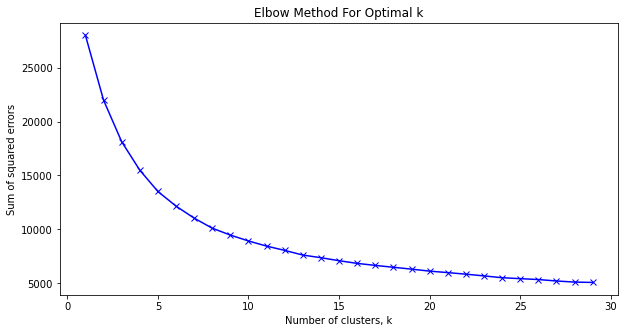

In [8]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
# Implementation of the Elbow method
Sum_of_squared_errors = []
#Definition of the number of clusters to evaluated
K = range(1, 30)
for k in K:
 # Training of kmeans model using k clusers
 kmeans_model = KMeans(n_clusters = k, random_state = 42)
 kmeans_model.fit(dataset_standardized)
 # Computing the sum of squared errors for the trained model
 Sum_of_squared_error = kmeans_model.inertia_
 Sum_of_squared_errors.append(Sum_of_squared_error)
# Visualization of the Sum of Squared Error vs the Number of clusters curve
plt.figure(figsize=(10, 5))
plt.plot(K, Sum_of_squared_errors, 'bx-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Sum of squared errors')
plt.title('Elbow Method For Optimal k')
plt.show()

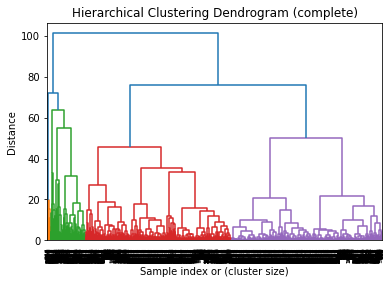

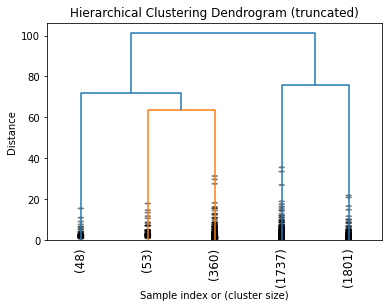

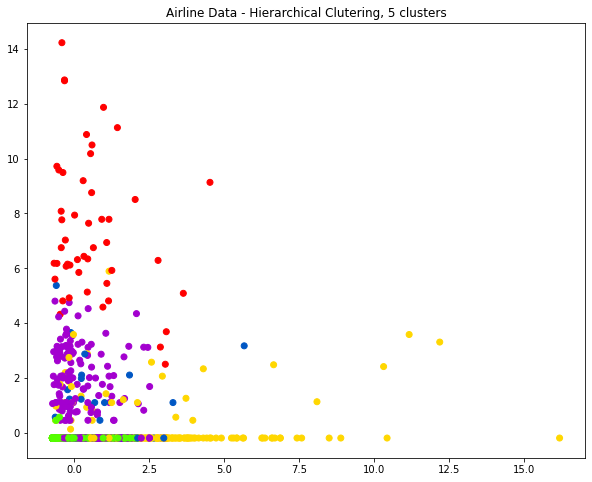

                           Balance    QualMiles    BonusMiles  BonusTrans  \
HierarchicalCluster                                                         
1                    135318.020833  5870.062500  16406.000000   12.645833   
2                    154830.603774   490.716981  32137.018868   33.471698   
3                    204316.227778   144.711111  36265.022222   19.802778   
4                     79910.013241   123.694876  26735.156592   16.832470   
5                     37353.074403     0.882288   3651.923931    4.246530   

                     FlightMiles  FlightTrans  DaysSinceEnroll  
HierarchicalCluster                                             
1                     974.770833     3.270833      4320.375000  
2                    8752.622642    23.679245      4046.830189  
3                    2286.719444     6.744444      4744.158333  
4                     148.672424     0.483592      4727.468048  
5                     137.491394     0.451416      3402.970572  


In [11]:
# import necessary packages
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#Loading and standardizing the data to normal distribution
url = "C:/Users/Amar/Downloads/AirlinesCluster.csv"
airlines_dataset = pd.read_csv(url)
dataset_standardized = preprocessing.scale(airlines_dataset)
dataset_standardized_pd = pd.DataFrame(dataset_standardized)
#Creating the linkage matrix and perform hierarchical clustering on samples
hierarchical_cluster = linkage(dataset_standardized,'ward')
#Plot a complete dendrogram
plt.title('Hierarchical Clustering Dendrogram (complete)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
dendrogram(hierarchical_cluster,
 leaf_rotation=90,
 leaf_font_size=6,
 )
plt.show()
#Plot a truncated dendrogram at 5 clusters
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
dendrogram(
 hierarchical_cluster,
 truncate_mode='lastp', # show only the last p merged clusters
 p=5, # show only the last p merged clusters
 leaf_rotation=90.,
 leaf_font_size=12.,
 show_contracted=True, # to get a distribution impression in truncated branches
)
plt.show()
# visualization of the clustered data using 5 clusters
num_clusters=5
hierarchical_cluster_predictions= fcluster(hierarchical_cluster, num_clusters,
criterion='maxclust')
hierarchical_cluster_predictions[0:30:,]
# Plotting clustered data using independent colors
plt.figure(figsize=(10, 8))
dataset_standardized_pd = pd.DataFrame(dataset_standardized)
plt.scatter(dataset_standardized_pd.iloc[:,0],
dataset_standardized_pd.iloc[:,1],c=hierarchical_cluster_predictions, cmap='prism')
plt.title('Airline Data - Hierarchical Clutering, 5 clusters')
plt.show()
#visualization of descriptive stats of the clustered data using 5 clusters
cluster_Hierarchical_data = pd.DataFrame(hierarchical_cluster_predictions)
airlines_dataset['HierarchicalCluster'] = cluster_Hierarchical_data
hierarchical_cluster_pd =pd.DataFrame(airlines_dataset.groupby('HierarchicalCluster').mean())
print(hierarchical_cluster_pd)